In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:

from RaTag.datatypes import Run
from RaTag.config import IntegrationConfig, FitConfig
from RaTag.pipeline_optimized import (
    prepare_run_optimized,
    run_unified_integration,
    run_s2_fitting,
    run_calibration_analysis_optimized
)
from RaTag.constructors import populate_run
import RaTag.plotting as plotting
from RaTag.dataIO import load_wfm
%matplotlib inline

In [175]:
base_dir = Path('/Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN11_FF_test')

run11 = Run(
    root_directory = base_dir,
    run_id = "RUN11",
    el_field = 2375,            # V/cm
    target_isotope = "Rn220",
    pressure = 2.0,             # bar
    temperature = 297,          # K
    sampling_rate = 5e9,        # Hz (5 GS/s for FastFrame)
    el_gap = 0.8,               # cm
    drift_gap = 1.4,            # cm
    width_s2 = 20,              # µs
    
    # Calibration constants
    W_value = 22.0,             # eV per e-ion pair (Xe @ 2 bar)
    E_gamma_xray = 11.7e3,      # eV (Ra-224 X-ray energy)
)

In [236]:
run11 = populate_run(run11)

  Loaded: FieldScan_Gate0100_Anode2000 - 3 files (144 waveforms) [FastFrame (48 frames/file)]
  Loaded: FieldScan_Gate0200_Anode2100 - 4 files (192 waveforms) [FastFrame (48 frames/file)]


In [242]:
# Prepare run with optimized S2 window estimation
run11 = prepare_run_optimized(
    run11,
    flag_plot=False,
    max_frames_s1=50,         # Only 200 frames needed for S1 estimation
    estimate_s2_windows=True,
    max_frames_s2=200,        # Only 500 frames needed for S2 window estimation
    s2_duration_cuts=(5, 25),
    threshold_s2=1.0
)

PREPARING RUN (OPTIMIZED): RUN11

[1/4] Gas density: 4.877e+19 cm⁻³
  Loaded: FieldScan_Gate0100_Anode2000 - 3 files (144 waveforms) [FastFrame (48 frames/file)]
  Loaded: FieldScan_Gate0200_Anode2100 - 4 files (192 waveforms) [FastFrame (48 frames/file)]

[2/4] Loaded 2 sets (all files)

[3/4] Preparing sets (using ~50 frames for S1 estimation)...

  Set 1/2: FieldScan_Gate0100_Anode2000
  S1 estimation: processing 2 files (~96 frames)
  → t_s1 = -3.134 ± 5.088 µs (from 13 frames)

  Set 2/2: FieldScan_Gate0200_Anode2100
  S1 estimation: processing 2 files (~96 frames)
  → t_s1 = -2.987 ± 4.118 µs (from 27 frames)

[4/4] Estimating S2 timing windows (using ~200 frames per set)...

  S2 estimation: processing 5 files (~200 frames)
✓ FieldScan_Gate0100_Anode2000:
  S2 Start:    18.25 ± 1.88 µs, rel. error: 10.28 %
  S2 End:      23.42 ± 1.98 µs, rel. error: 8.45 %
  S2 Duration: 7.11 ± 3.85 µs
  S2 estimation: processing 5 files (~200 frames)
✓ FieldScan_Gate0200_Anode2100:
  S2 Start: 

In [190]:
pset = run11.sets[0] 
pset.metadata

{'anode': 2000,
 'gate': 100,
 't_s1': np.float64(-3.134),
 't_s1_std': np.float64(5.088),
 't_s2_start': np.float64(18.2495),
 't_s2_start_std': np.float64(1.8768000000000011),
 't_s2_end': np.float64(23.417899999999996),
 't_s2_end_std': np.float64(1.9799000000000007),
 's2_duration': np.float64(7.106999999999996),
 's2_duration_std': np.float64(3.854212000000003)}

(<Axes: title={'center': 'Waveform 3, frame 31 of 48'}, xlabel='Time (µs)', ylabel='Signal (mV)'>,
 np.float64(38.20000305771828))

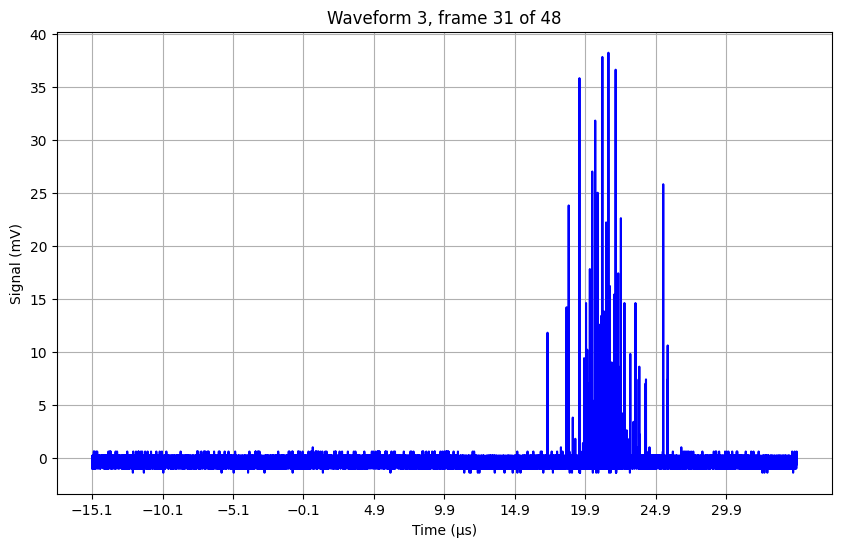

In [199]:

file = pset.source_dir / pset.filenames[2]
wf = load_wfm(file)
plotting.plot_waveform(wf, )

In [223]:
frame = 20

<Axes: title={'center': 'Gate 100 V, File 3, frame 25 of 48'}, xlabel='Time (µs)', ylabel='Signal (mV)'>

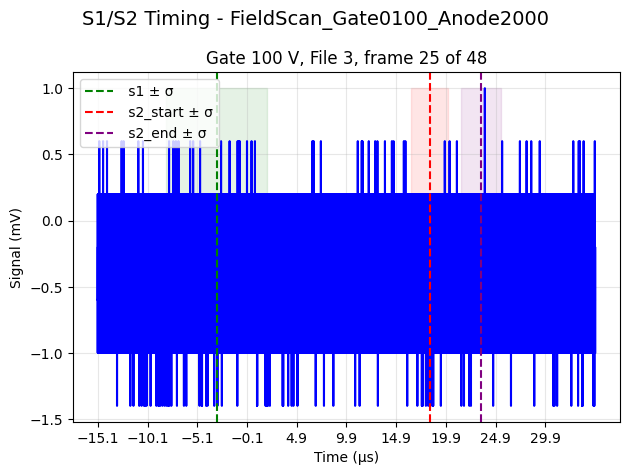

In [257]:
frame += 1
plotting.plot_set_windows(pset, file_index=2, frame=frame)

['RUN11_20251016_Gate100_Anode2000_P2_3Wfm.wfm'
 'RUN11_20251016_Gate100_Anode2000_P2_2Wfm.wfm'
 'RUN11_20251016_Gate100_Anode2000_P2_1Wfm.wfm']


(<Figure size 1000x1200 with 3 Axes>,
 array([<Axes: title={'center': 'Gate 100 V, File 3, frame 4 of 48'}, xlabel='Time (µs)', ylabel='Signal (mV)'>,
        <Axes: title={'center': 'Gate 100 V, File 2, frame 5 of 48'}, xlabel='Time (µs)', ylabel='Signal (mV)'>,
        <Axes: title={'center': 'Gate 100 V, File 1, frame 32 of 48'}, xlabel='Time (µs)', ylabel='Signal (mV)'>],
       dtype=object))

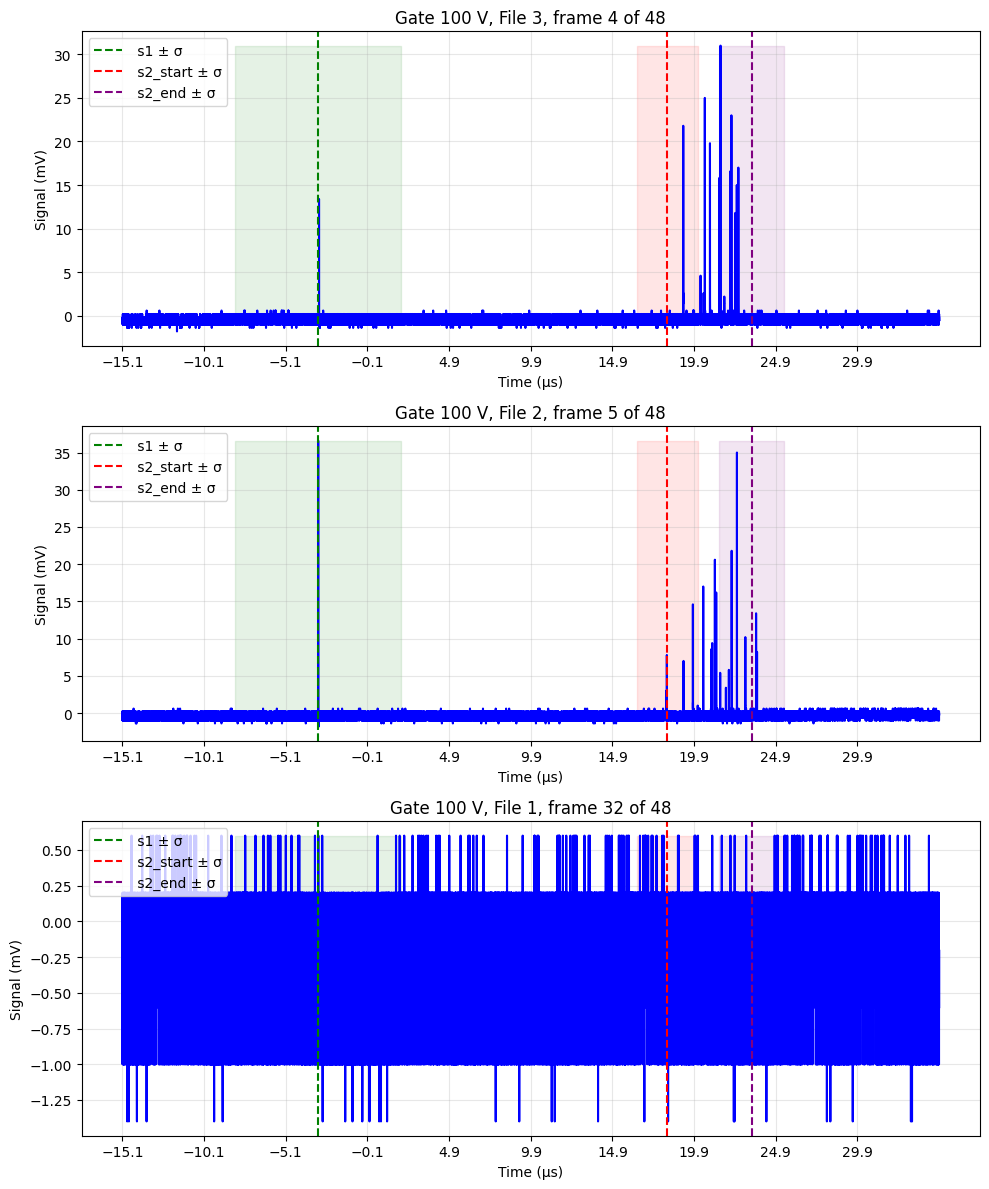

In [258]:
plotting.plot_n_waveforms(pset, n_waveforms=3)

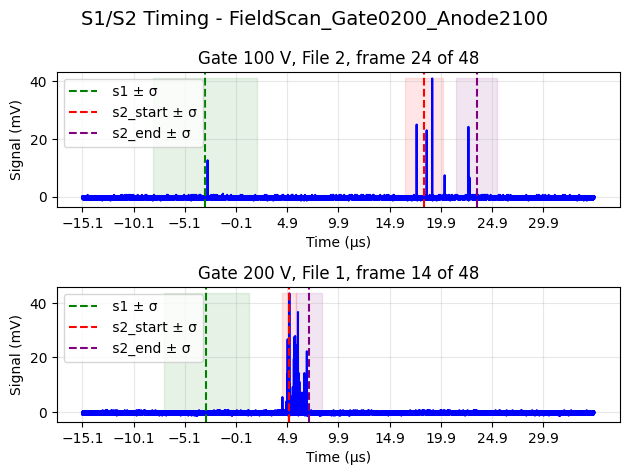

In [ ]:
fig, ax = plt.subplots(len(run11.sets))
for i,s in enumerate(run11.sets):
    plotting.plot_set_windows(s, ax=ax[i])

In [277]:
set_pmt = pset

results_dict = {}
results_dict["set_metadata"] = {
            "t_s1": set_pmt.metadata.get("t_s1"),
            "t_s1_std": set_pmt.metadata.get("t_s1_std"),
            "t_s2_start": set_pmt.metadata.get("t_s2_start"),
            "t_s2_start_std": set_pmt.metadata.get("t_s2_start_std"),
            "t_s2_end": set_pmt.metadata.get("t_s2_end_"),
            "t_s2_end_std": set_pmt.metadata.get("t_s2_end_std"),
            "s2_duration": set_pmt.metadata.get("s2_duration"),
            "s2_duration_std": set_pmt.metadata.get("s2_duration_std"),
            "drift_field": float(set_pmt.drift_field) if set_pmt.drift_field is not None else None,
            "EL_field": float(set_pmt.EL_field) if set_pmt.EL_field is not None else None,
            "time_drift": float(set_pmt.time_drift) if set_pmt.time_drift is not None else None,
            "speed_drift": float(set_pmt.speed_drift) if set_pmt.speed_drift is not None else None,
            "red_drift_field": float(set_pmt.red_drift_field) if set_pmt.red_drift_field is not None else None,
        }
results_dict

{'set_metadata': {'t_s1': np.float64(-3.134),
  't_s1_std': np.float64(5.088),
  't_s2_start': np.float64(18.2495),
  't_s2_start_std': np.float64(1.8768000000000011),
  't_s2_end': None,
  't_s2_end_std': np.float64(1.9799000000000007),
  's2_duration': np.float64(7.106999999999996),
  's2_duration_std': np.float64(3.854212000000003),
  'drift_field': 71.42857142857143,
  'EL_field': 2375.0,
  'time_drift': 15.137548167034852,
  'speed_drift': 0.924852548478617,
  'red_drift_field': 0.1464474117857143}}

In [279]:
for key, val in set_pmt.metadata.items():
    print(key, val)

anode 2000
gate 100
t_s1 -3.134
t_s1_std 5.088
t_s2_start 18.2495
t_s2_start_std 1.8768000000000011
t_s2_end 23.417899999999996
t_s2_end_std 1.9799000000000007
s2_duration 7.106999999999996
s2_duration_std 3.854212000000003


In [280]:
import json
import os
ppath = base_dir / 'processed' / pset.source_dir.name
if not os.path.exists(ppath):
    print('Path does not exist, creating it...')
    os.mkdir(ppath)

fileout = ppath / 'set_preprocessed.json'
with open(fileout, 'w') as fo:
    json.dump(results_dict, fo)

In [297]:
run11.gas_density

4.877421222922505e+19

In [326]:
from RaTag.transport import transport_saturation, drift_curve, gas_density_cm3, redfield_to_speed
from RaTag.config import DRIFT_VELOCITY_PARAMS, DRIFT_FIELDS
from RaTag.units import to_Td, Td_to_Vpcm

In [301]:

g_den = gas_density_cm3(run11.pressure, run11.temperature)

In [307]:
RED_FIELDS_VCM2 = np.array(DRIFT_FIELDS) / g_den
RED_FIELDS_TD= to_Td(RED_FIELDS_VCM2)
v_drifts = drift_curve(RED_FIELDS_TD, DRIFT_VELOCITY_PARAMS)

In [323]:
path = '/Users/pabloherrero/sabat/RaTagging/scope_data/driftSpeed_redField_data.csv'
drift_data = pd.read_csv(path, names = ['red_field', 'drift_speed'])
drift_data

,red_field,drift_speed
0,0.044879,0.476900
1,0.055236,0.610434
2,0.069045,0.699450
3,0.089758,0.791638
4,0.110472,0.858388
5,0.141542,0.902871
6,0.203682,0.975937
7,0.238205,1.001337
8,0.383199,1.131549
9,0.535098,1.179083


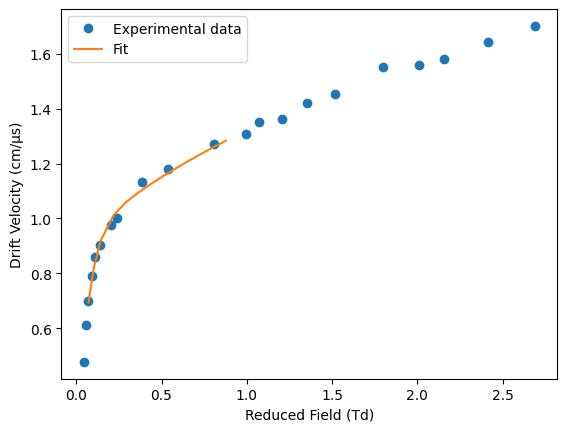

In [ ]:
plt.plot(drift_data['red_field'], drift_data['drift_speed'], 'o' , label='Experimental data')
plt.plot(RED_FIELDS_TD, v_drifts, label='Fit')
plt.gca().set(xlabel='Reduced Field (Td)', ylabel='Drift Velocity (cm/µs)')
plt.legend()

In [ ]:
from scipy.optimize import brentq

def speed_to_redfield(v_drift: float, 
                     params: dict = DRIFT_VELOCITY_PARAMS,
                     rE_min: float = 0.01,
                     rE_max: float = 3.0) -> float:
    """
    Invert the drift velocity model to find reduced field [Td].
    
    Args:
        v_drift: drift velocity [cm/μs]
        params: dict with keys p0, p1, p2, p3 for transport_saturation()
        rE_min: minimum reduced field to search [Td]
        rE_max: maximum reduced field to search [Td]
    
    Returns:
        rE: reduced electric field [Td]
    """
    def residual(rE):
        return transport_saturation(rE, **params) - v_drift
    
    try:
        return brentq(residual, rE_min, rE_max)
    except ValueError as e:
        raise ValueError(f"Could not find solution for v_drift={v_drift} cm/μs. "
                        f"Valid range: [{transport_saturation(rE_min, **params):.3f}, "
                        f"{transport_saturation(rE_max, **params):.3f}] cm/μs") from e

def speed_to_redfield_vectorized(v_drifts: np.ndarray,
                                params: dict = DRIFT_VELOCITY_PARAMS,
                                rE_min: float = 0.01,
                                rE_max: float = 3.0) -> np.ndarray:
    """
    Vectorized version for multiple drift velocities.
    
    Args:
        v_drifts: array of drift velocities [cm/μs]
        params: dict with keys p0, p1, p2, p3
        rE_min, rE_max: search bounds [Td]
    
    Returns:
        array of reduced electric fields [Td]
    """
    return np.array([speed_to_redfield(v, params, rE_min, rE_max) 
                     for v in v_drifts])

In [335]:
# Single value
v_measured = 1.3  # cm/μs
rE_inverted = speed_to_redfield(v_measured)
print(f"For v={v_measured} cm/μs → rE={rE_inverted:.3f} Td")

# Multiple values
v_array = np.linspace(0.6, 1.6, 10)
rE_array = speed_to_redfield_vectorized(v_array)

# Verify round-trip
v_check = redfield_to_speed(rE_inverted)
print(f"Round-trip error: {abs(v_check - v_measured):.2e} cm/μs")

For v=1.3 cm/μs → rE=0.930 Td
Round-trip error: 2.22e-16 cm/μs


In [336]:
E_Vpcm = Td_to_Vpcm(rE_inverted) * g_den
E_Vpcm

453.5271847991767

In [333]:
200/1.4

142.85714285714286